In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.5
pandas version :  1.1.5
seaborn version :  0.11.2


# Data Pre-Processing & EDA

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('flight (1).csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
nums= ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [ ]:
cats= ['FFP_DATE','FIRST_FLIGHT_DATE','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY','LOAD_TIME','LAST_FLIGHT_DATE']
df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


# Duplicate Values

In [ ]:
df.duplicated().sum()

0

# Missing Values

In [ ]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
#Mengisi data yang kosong
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())

In [ ]:
#menghapus kolom work_city, work_province, work_country, gender
df = df.drop(['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], axis = 1)

In [ ]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

# Outliers

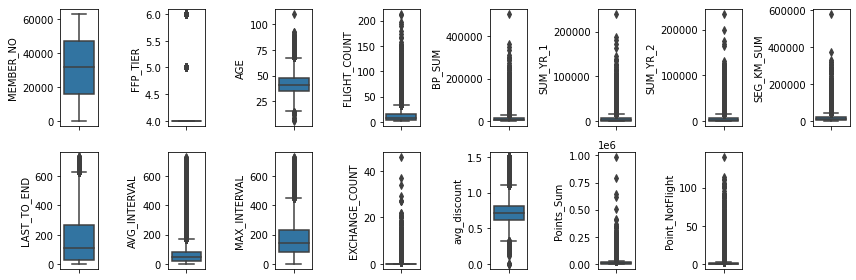

In [ ]:
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.boxplot(y = df[nums[i]], orient='v')
    plt.tight_layout()

# EDA

In [ ]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,6,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,6,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,6,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,5,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,6,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


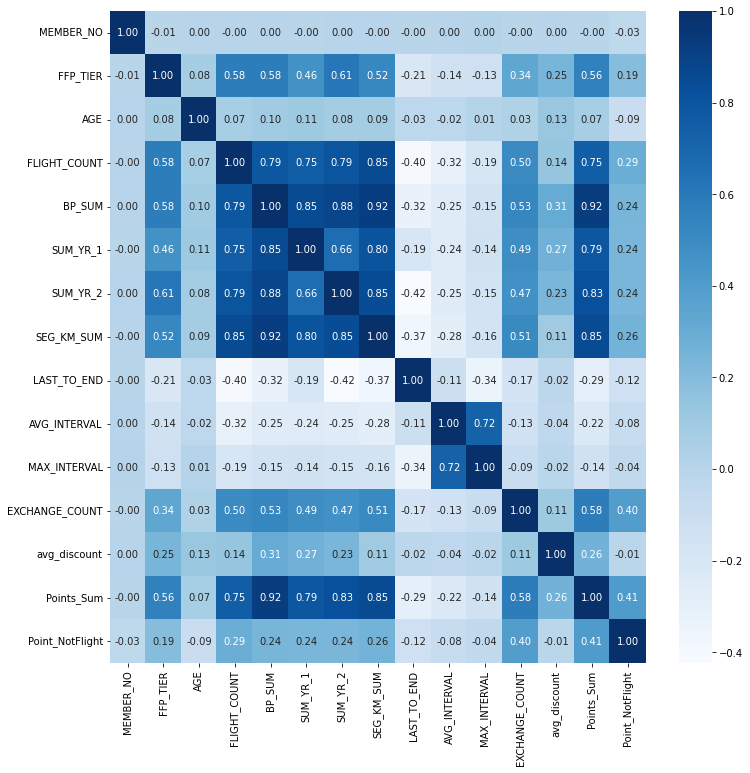

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

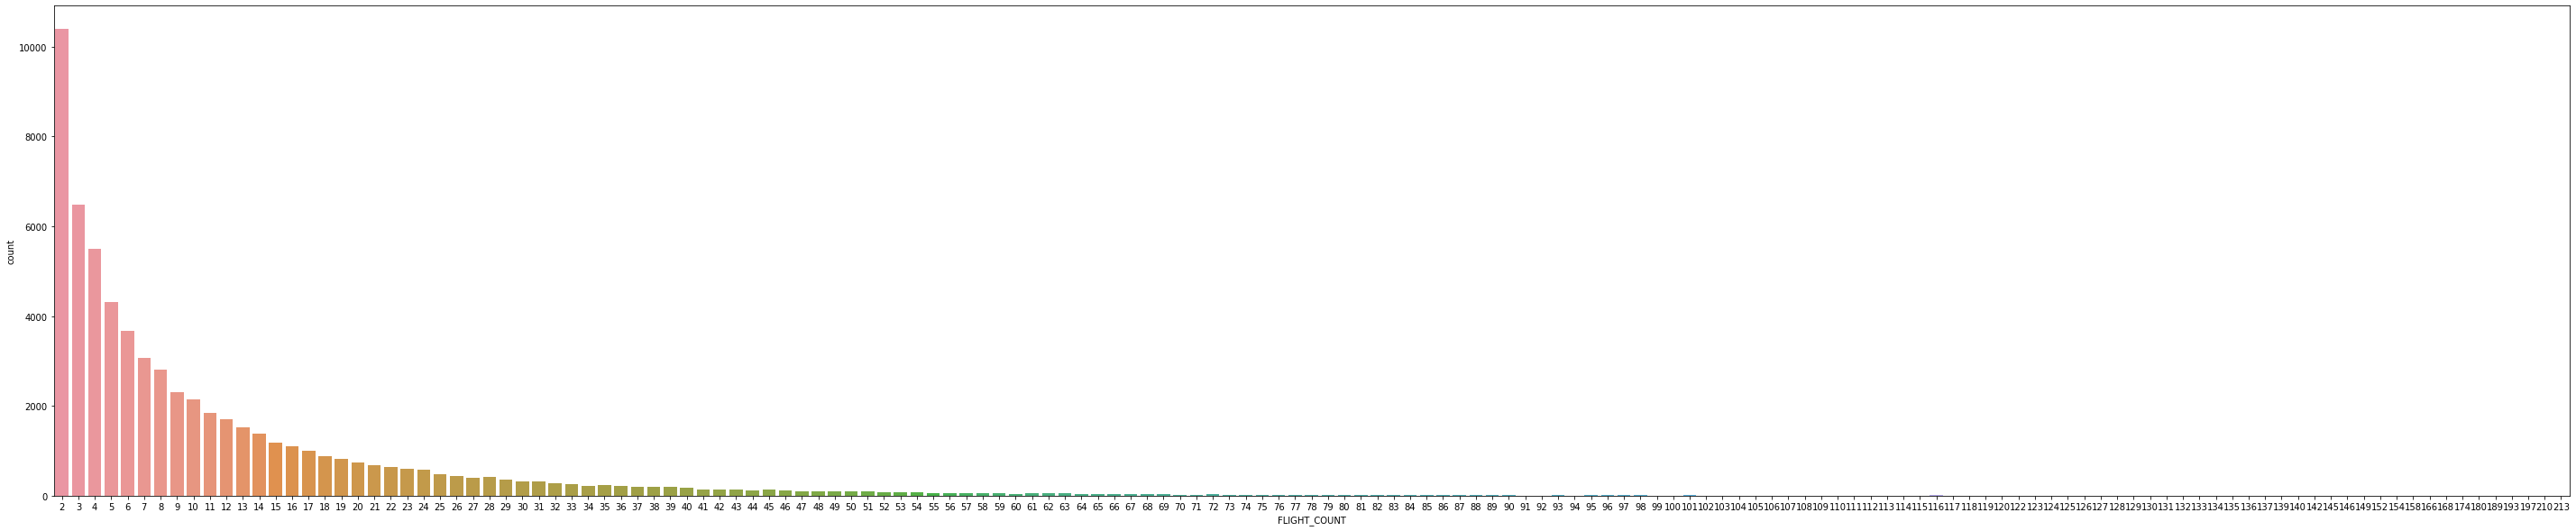

In [ ]:
plt.figure(figsize=(50,10))
ax = sns.countplot(x="FLIGHT_COUNT", data=df)

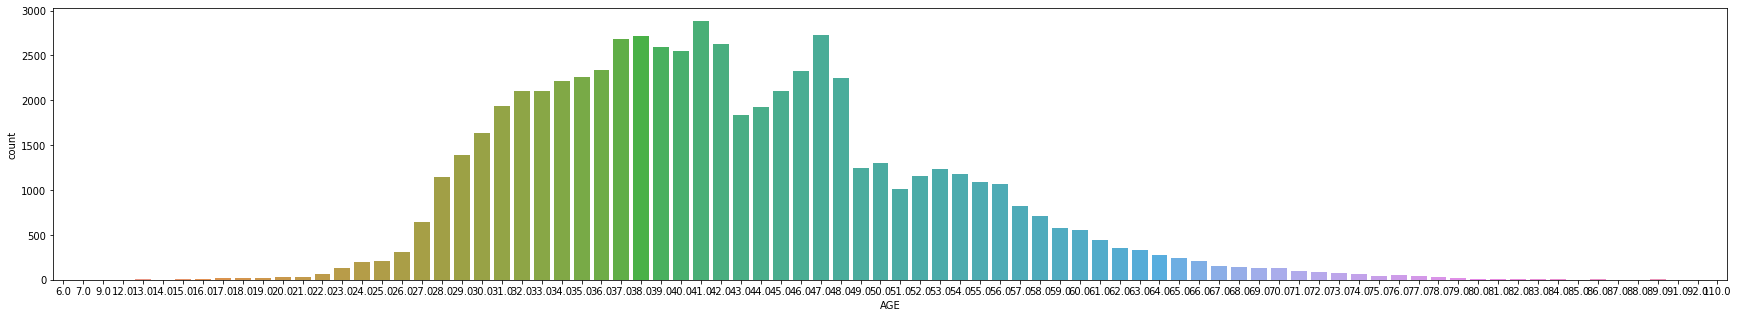

In [ ]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x="AGE", data=df)

Distribusi pelanggan berada di usia produktif yaitu 27 - 55 tahun
Mengartikan bahwa banyak perjalanan bisnis yang dilakukan pelanggan

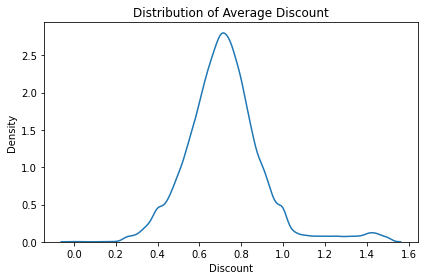

In [ ]:
ax = sns.kdeplot(x = 'avg_discount', data=df)
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

banyak average discount yang > 1 (100%) dianggap tidak valid, akan di drop

In [ ]:
df = df[df['avg_discount']<=1]

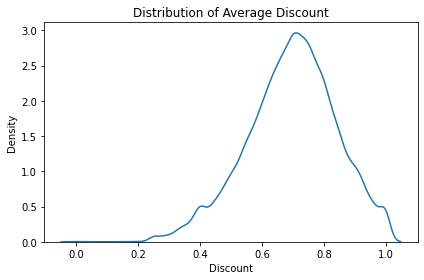

In [ ]:
ax = sns.kdeplot(x = 'avg_discount', data=df)
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

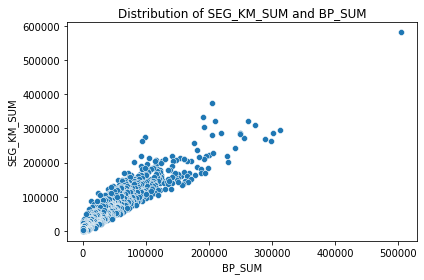

In [ ]:
ax = sns.scatterplot(x = 'BP_SUM', y = 'SEG_KM_SUM',  data=df)
ax.set_title("Distribution of SEG_KM_SUM and BP_SUM")
ax.set_ylabel("SEG_KM_SUM")
ax.set_xlabel("BP_SUM")
plt.tight_layout()

In [ ]:
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,60041.000000,60041.000000,60041.000000,60041.00000,60041.000000,60041.000000,60041.000000,60041.000000,60041.000000,60041.000000,60041.000000,60041.000000,60041.000000,60041.000000,60041.000000
mean,31505.292833,4.081727,42.167186,11.65422,10034.104778,4954.808203,5205.391599,16772.027931,177.260855,67.875748,166.267517,0.299629,0.695875,11561.295448,2.729718
std,18191.245419,0.328371,9.740345,13.75629,14010.728738,7030.195226,7659.615275,20335.635374,184.117824,77.374097,123.569936,1.062595,0.144030,17908.780708,7.402475
min,1.000000,4.000000,6.000000,2.00000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15736.000000,4.000000,35.000000,3.00000,2432.000000,983.000000,757.000000,4713.000000,30.000000,23.500000,79.000000,0.000000,0.605626,2684.000000,0.000000
50%,31528.000000,4.000000,41.000000,7.00000,5457.000000,2744.000000,2688.000000,9878.000000,109.000000,44.875000,143.000000,0.000000,0.703390,6070.000000,0.000000
75%,47269.000000,4.000000,48.000000,14.00000,12133.000000,6236.000000,6520.000000,20893.000000,270.000000,82.400000,228.000000,0.000000,0.794527,13570.000000,1.000000
max,62988.000000,6.000000,110.000000,210.00000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.000000,985572.000000,140.000000


## Feature Selection 1

Berdasarkan heatmap pertama:

*   Fitur yang nilai korelasinya rendah dan dianggap tidak berhubungan dalam penyelesaian masalah akan didrop dari dataset: `member_no`, `age`, `exchange_count`, `sum_yr_1`, `sum_yr_2`, `point_notflight`, `avg_interval`, `max_interval`



In [ ]:
dfx = df.copy()

In [ ]:
dfx = dfx.drop(['MEMBER_NO','AGE','EXCHANGE_COUNT','SUM_YR_1','SUM_YR_2','Point_NotFlight','AVG_INTERVAL','MAX_INTERVAL'], axis = 1)

In [ ]:
dfx.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount,Points_Sum
0,11/2/2006,12/24/2008,6,3/31/2014,210,505308,580717,3/31/2014,1,0.961639,619760
4,4/10/2009,4/15/2009,6,3/31/2014,152,273844,309928,3/27/2014,5,0.970658,338813
5,2/10/2008,9/29/2009,6,3/31/2014,92,313338,294585,1/13/2014,79,0.967692,343121
6,3/22/2006,3/29/2006,6,3/31/2014,101,248864,287042,3/31/2014,1,0.965347,298873
7,4/9/2010,4/9/2010,6,3/31/2014,73,301864,287230,3/29/2014,3,0.962070,351198


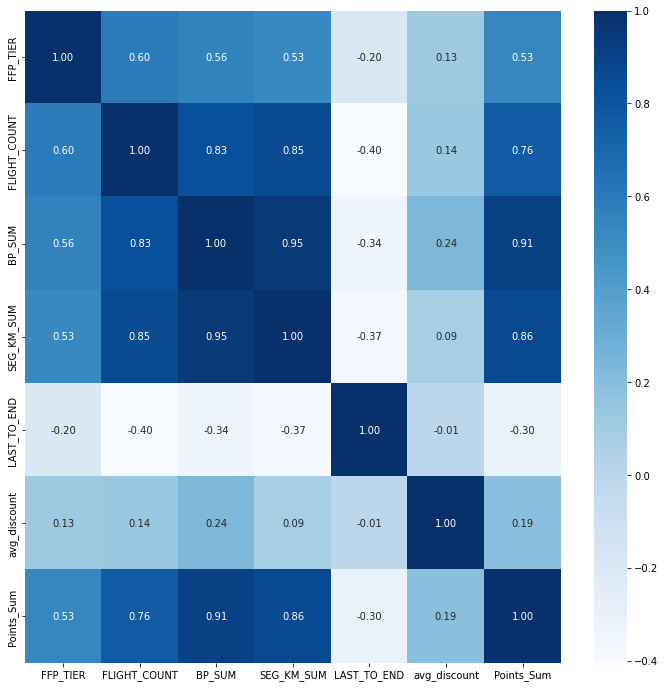

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(dfx.corr(), cmap='Blues', annot=True, fmt='.2f')

## Feature Selection 2

Berdasarkan heatmap kedua:


*   Fitur penting: dipilih menggunakan model LRFMC dimana fitur yang digunakan untuk model ini adalah: `load_time`, `ffp_date`, `last_to_end`, `flight_count`, `seg_km_sum`, `avg_discount`
*   Dari EDA (heatmap) dilihat juga fitur yang berkorelasi sangat tinggi seperti  `bp_sum`, `seg_km_sum`, dan `point_sum` sehingga dalam modeling bisa memilih salah satu saja yaitu `seg_km_sum` sehingga `bp_sum` dan `point_sum` akan didrop

In [ ]:
dfx = dfx.drop(['BP_SUM','Points_Sum'], axis = 1)

In [ ]:
dfx.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount
0,11/2/2006,12/24/2008,6,3/31/2014,210,580717,3/31/2014,1,0.961639
4,4/10/2009,4/15/2009,6,3/31/2014,152,309928,3/27/2014,5,0.970658
5,2/10/2008,9/29/2009,6,3/31/2014,92,294585,1/13/2014,79,0.967692
6,3/22/2006,3/29/2006,6,3/31/2014,101,287042,3/31/2014,1,0.965347
7,4/9/2010,4/9/2010,6,3/31/2014,73,287230,3/29/2014,3,0.962070


Summary:
- Distribusi pelanggan banyak terpusat di umur produktif (27 – 55 tahun). Hal ini bisa menjadi insight bahwa pelanggan melakukan perjalanan bisnis
- Pelanggan Loyal bisa dilihat dari pembagian flight count per tahun menjadi member 
- Pelanggan lama bisa dilihat dari tanggal data diambil dikurang FFP join date

Feature yang tidak ada akan ditambahkan dalam feature engineering


## FEATURE ENGINEERING

In [ ]:
dfa = dfx.copy()
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           60041 non-null  object 
 1   FIRST_FLIGHT_DATE  60041 non-null  object 
 2   FFP_TIER           60041 non-null  int64  
 3   LOAD_TIME          60041 non-null  object 
 4   FLIGHT_COUNT       60041 non-null  int64  
 5   SEG_KM_SUM         60041 non-null  int64  
 6   LAST_FLIGHT_DATE   60041 non-null  object 
 7   LAST_TO_END        60041 non-null  int64  
 8   avg_discount       60041 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 4.6+ MB


In [ ]:
dfa[dfa['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00']

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount
832,7/13/2005,8/6/2005,5,3/31/2014,80,114222,2014/2/29 0:00:00,32,0.664970
1292,11/23/2010,11/23/2010,5,3/31/2014,64,93264,2014/2/29 0:00:00,32,0.682162
1294,12/15/2012,1/5/2013,4,3/31/2014,67,89045,2014/2/29 0:00:00,32,0.714237
1400,1/20/2011,1/20/2011,5,3/31/2014,58,90921,2014/2/29 0:00:00,32,0.676097
1434,2/12/2009,2/13/2009,5,3/31/2014,58,74908,2014/2/29 0:00:00,32,0.810649
...,...,...,...,...,...,...,...,...,...
61539,1/11/2013,7/10/2013,4,3/31/2014,3,3513,2014/2/29 0:00:00,32,0.276667
61871,7/26/2009,7/26/2009,4,3/31/2014,2,1298,2014/2/29 0:00:00,32,0.690000
61909,4/11/2011,4/20/2011,4,3/31/2014,2,2595,2014/2/29 0:00:00,32,0.340000
62721,10/31/2007,3/13/2008,4,3/31/2014,2,1199,2014/2/29 0:00:00,32,0.489525


In [ ]:
dfa['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')

In [ ]:
cats = ['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']
dfa[cats] = dfa[cats].astype('category')

In [ ]:
dfa_cat=dfa.select_dtypes(include='category')
dfa_cat.head(5)

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE
0,11/2/2006,12/24/2008,3/31/2014,3/31/2014
4,4/10/2009,4/15/2009,3/31/2014,3/27/2014
5,2/10/2008,9/29/2009,3/31/2014,1/13/2014
6,3/22/2006,3/29/2006,3/31/2014,3/31/2014
7,4/9/2010,4/9/2010,3/31/2014,3/29/2014


In [ ]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dfa_num=dfa.select_dtypes(include=numeric)
dfa_num.describe().T

,count,mean,std,min,25%,50%,75%,max
FFP_TIER,60041.0,4.081727,0.328371,4.0,4.000000,4.00000,4.000000,6.0
FLIGHT_COUNT,60041.0,11.654220,13.756290,2.0,3.000000,7.00000,14.000000,210.0
SEG_KM_SUM,60041.0,16772.027931,20335.635374,368.0,4713.000000,9878.00000,20893.000000,580717.0
LAST_TO_END,60041.0,177.260855,184.117824,1.0,30.000000,109.00000,270.000000,731.0
avg_discount,60041.0,0.695875,0.144030,0.0,0.605626,0.70339,0.794527,1.0


In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   FFP_DATE           60041 non-null  category
 1   FIRST_FLIGHT_DATE  60041 non-null  category
 2   FFP_TIER           60041 non-null  int64   
 3   LOAD_TIME          60041 non-null  category
 4   FLIGHT_COUNT       60041 non-null  int64   
 5   SEG_KM_SUM         60041 non-null  int64   
 6   LAST_FLIGHT_DATE   60041 non-null  category
 7   LAST_TO_END        60041 non-null  int64   
 8   avg_discount       60041 non-null  float64 
dtypes: category(4), float64(1), int64(4)
memory usage: 3.5 MB


In [ ]:
## format data yang merupakan tanggal
dfa["LOAD_TIME"] = pd.to_datetime(dfa["LOAD_TIME"])
dfa["FFP_DATE"] = pd.to_datetime(dfa["FFP_DATE"])
dfa["FIRST_FLIGHT_DATE"] = pd.to_datetime(dfa["FIRST_FLIGHT_DATE"])
dfa["LAST_FLIGHT_DATE"] = pd.to_datetime(dfa["LAST_FLIGHT_DATE"])
dfa["LOAD_TIME"] = dfa["LOAD_TIME"].values.astype('datetime64[ns]')
dfa["FFP_DATE"] = dfa["FFP_DATE"].values.astype('datetime64[ns]')
dfa["FIRST_FLIGHT_DATE"] = dfa["FIRST_FLIGHT_DATE"].values.astype('datetime64[ns]')
dfa["LAST_FLIGHT_DATE"] = dfa["LAST_FLIGHT_DATE"].values.astype('datetime64[ns]')

In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           60041 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  60041 non-null  datetime64[ns]
 2   FFP_TIER           60041 non-null  int64         
 3   LOAD_TIME          60041 non-null  datetime64[ns]
 4   FLIGHT_COUNT       60041 non-null  int64         
 5   SEG_KM_SUM         60041 non-null  int64         
 6   LAST_FLIGHT_DATE   60041 non-null  datetime64[ns]
 7   LAST_TO_END        60041 non-null  int64         
 8   avg_discount       60041 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int64(4)
memory usage: 4.6 MB


In [ ]:
dfa['Meeting_Time'] = (dfa['LOAD_TIME'] - dfa['FFP_DATE'])/np.timedelta64(1,'M')

In [ ]:
dfa.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount,Meeting_Time
0,2006-11-02,2008-12-24,6,2014-03-31,210,580717,2014-03-31,1,0.961639,88.905316
4,2009-04-10,2009-04-15,6,2014-03-31,152,309928,2014-03-27,5,0.970658,59.664469
5,2008-02-10,2009-09-29,6,2014-03-31,92,294585,2014-01-13,79,0.967692,73.627795
6,2006-03-22,2006-03-29,6,2014-03-31,101,287042,2014-03-31,1,0.965347,96.297665
7,2010-04-09,2010-04-09,6,2014-03-31,73,287230,2014-03-29,3,0.962070,47.705292


In [ ]:
dfa['Flight_Count/Year']= dfa['FLIGHT_COUNT']/ ((dfa['LAST_FLIGHT_DATE'] - dfa['FIRST_FLIGHT_DATE'])/np.timedelta64(1,'Y'))

In [ ]:
dfa.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year
0,2006-11-02,2008-12-24,6,2014-03-31,210,580717,2014-03-31,1,0.961639,88.905316,39.886076
4,2009-04-10,2009-04-15,6,2014-03-31,152,309928,2014-03-27,5,0.970658,59.664469,30.723221
5,2008-02-10,2009-09-29,6,2014-03-31,92,294585,2014-01-13,79,0.967692,73.627795,21.443720
6,2006-03-22,2006-03-29,6,2014-03-31,101,287042,2014-03-31,1,0.965347,96.297665,12.616106
7,2010-04-09,2010-04-09,6,2014-03-31,73,287230,2014-03-29,3,0.962070,47.705292,18.388071


In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           60041 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  60041 non-null  datetime64[ns]
 2   FFP_TIER           60041 non-null  int64         
 3   LOAD_TIME          60041 non-null  datetime64[ns]
 4   FLIGHT_COUNT       60041 non-null  int64         
 5   SEG_KM_SUM         60041 non-null  int64         
 6   LAST_FLIGHT_DATE   60041 non-null  datetime64[ns]
 7   LAST_TO_END        60041 non-null  int64         
 8   avg_discount       60041 non-null  float64       
 9   Meeting_Time       60041 non-null  float64       
 10  Flight_Count/Year  60041 non-null  float64       
dtypes: datetime64[ns](4), float64(3), int64(4)
memory usage: 5.5 MB


In [ ]:
dfa = dfa.drop(['FFP_DATE','FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE','LOAD_TIME','FLIGHT_COUNT'], axis = 1)

In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_TIER           60041 non-null  int64  
 1   SEG_KM_SUM         60041 non-null  int64  
 2   LAST_TO_END        60041 non-null  int64  
 3   avg_discount       60041 non-null  float64
 4   Meeting_Time       60041 non-null  float64
 5   Flight_Count/Year  60041 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 3.2 MB


In [ ]:
dfa.head()

,FFP_TIER,SEG_KM_SUM,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year
0,6,580717,1,0.961639,88.905316,39.886076
4,6,309928,5,0.970658,59.664469,30.723221
5,6,294585,79,0.967692,73.627795,21.443720
6,6,287042,1,0.965347,96.297665,12.616106
7,6,287230,3,0.962070,47.705292,18.388071


In [ ]:
dfa.isnull().sum()

FFP_TIER             0
SEG_KM_SUM           0
LAST_TO_END          0
avg_discount         0
Meeting_Time         0
Flight_Count/Year    0
dtype: int64

Jadi 6 fitur yang akan dipakai adalah :
1. FFP_TIER, 
2. SEG_KM_SUM, 
3. LAST_TO_END, 
4. avg_discount, 
5. Meeting_Time
6. Flight_Count/Year

berdasarkan hasil feature engineering

## Handle Outliers

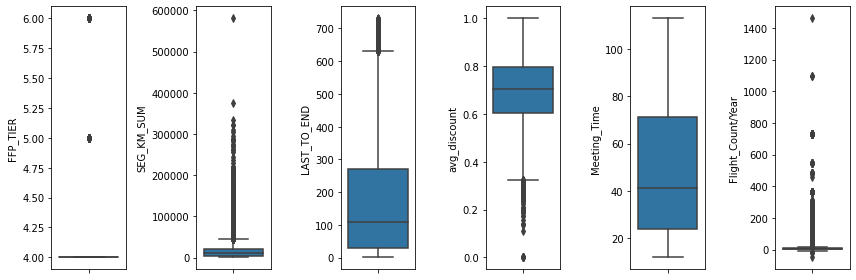

In [ ]:
nums=['FFP_TIER','SEG_KM_SUM','LAST_TO_END','avg_discount','Meeting_Time','Flight_Count/Year']
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(1, 6, i+1)
    sns.boxplot(y = dfa[nums[i]], orient='v')
    plt.tight_layout()

In [ ]:

print(f'Jumlah baris sebelum memfilter outlier: {len(dfa)}')

fil_ent = np.array([True] * len(dfa))
for col in ['SEG_KM_SUM','LAST_TO_END','avg_discount','Meeting_Time','Flight_Count/Year']:
    Q1 = dfa[col].quantile(0.25)
    Q3 = dfa[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((dfa[col] >= low_limit) & (dfa[col] <= high_limit)) & fil_ent
    
dfa = dfa[fil_ent].reset_index()

print('Jumlah baris setelah memfilter outlier', len(dfa))

Jumlah baris sebelum memfilter outlier: 60041
Jumlah baris setelah memfilter outlier 48882


In [ ]:
dfa = dfa.drop(['FFP_TIER'], axis = 1)

## Standardisasi

In [ ]:
dfa =dfa[~dfa.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
from sklearn.preprocessing import StandardScaler
feats = ['SEG_KM_SUM','LAST_TO_END','avg_discount','Meeting_Time','Flight_Count/Year']
X = dfa[feats].values
X_std = StandardScaler().fit_transform(X)
dfs = pd.DataFrame(data=X_std, columns=feats)

In [ ]:
dfs.head()

,SEG_KM_SUM,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year
0,2.946823,-0.433412,2.186105,-0.640830,2.364728
1,3.151836,-0.776593,1.816499,0.463661,0.441358
2,3.006257,-0.242755,2.044803,2.258308,-0.290352
3,3.039276,1.225298,1.937261,0.669624,-0.609352
4,3.069732,-0.871921,1.869654,0.002352,1.326259


## Clustering: K-means

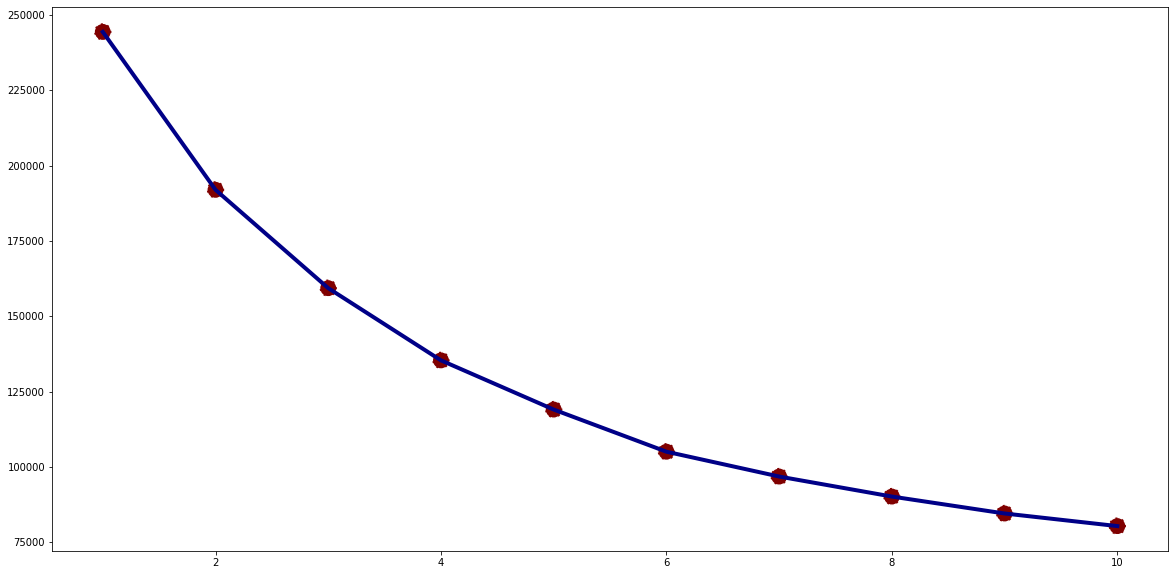

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfs)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dfs.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
dfs['cluster'] = kmeans.labels_
dfs.head()

,SEG_KM_SUM,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year,cluster
0,2.946823,-0.433412,2.186105,-0.640830,2.364728,1
1,3.151836,-0.776593,1.816499,0.463661,0.441358,1
2,3.006257,-0.242755,2.044803,2.258308,-0.290352,0
3,3.039276,1.225298,1.937261,0.669624,-0.609352,0
4,3.069732,-0.871921,1.869654,0.002352,1.326259,1


In [ ]:
dfa['cluster'] = kmeans.labels_

In [ ]:
display(dfa.groupby('cluster').agg(['mean','median']))

index         ... Flight_Count/Year          
                 mean median  ...              mean    median
cluster                       ...                            
0        26435.201628  23625  ...          2.259611  1.875443
1        19195.172600  15982  ...         10.550579  9.961159
2        40131.050767  39889  ...          3.673931  3.290473
3        44748.749663  46522  ...          2.944816  1.727888

[4 rows x 12 columns]

In [ ]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(dfs)
pcs = pca.transform(dfs)

In [ ]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = dfs['cluster']
data_pca.head()

,PC 1,PC 2,cluster
0,1.850496,2.894874,1
1,2.324234,0.969372,1
2,3.152077,-0.889668,0
3,1.945420,-0.335250,0
4,2.249357,1.870184,1


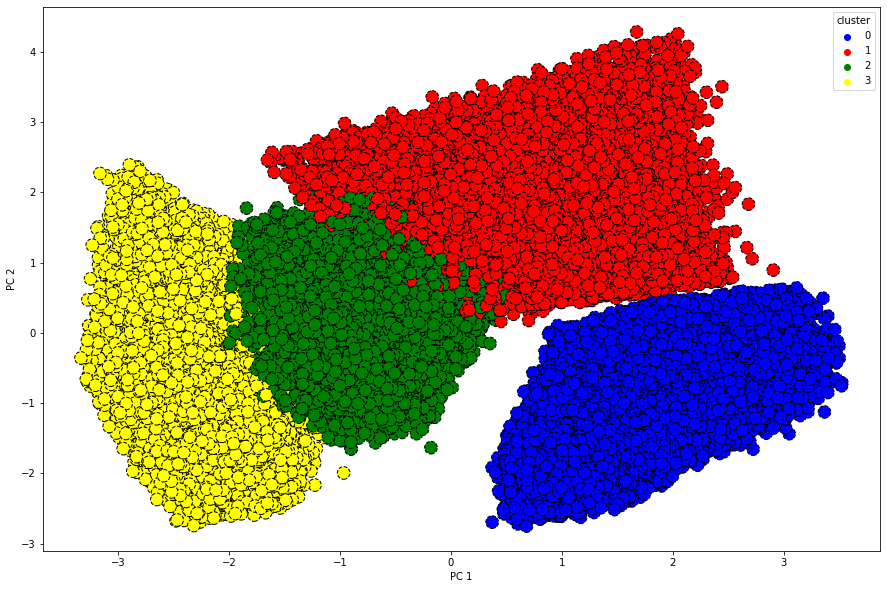

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','yellow'],
    s=160,
    ax=ax
)